# Taller 3: Machine Learning

### Importar Librerias

In [151]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

from statsmodels.graphics import utils
from statsmodels.compat.python import lrange, lzip


## 1. Exploración y Regresión en Python

### 1.2 Analisis Exploratorio de Datos (EDA)

In [152]:
# Tablero Clase:

# coeficientes
# prueba f / omnibus
# jar que bera / skewness / kurtosis
# AIC / BIC
# Durbin Watson

# Metricas:
# - MAE
# - MSE
# - RMSE

data = pd.read_csv('./real_estate_valuation_data_set.csv', index_col=0)

In [153]:
data.shape

(414, 7)

In [154]:
data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [155]:

data.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [156]:
data.dtypes

X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [157]:
# Datos NA
data_t = data.copy()
vacio = data.isna().sum()
print(vacio)

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


In [158]:
# Datos duplicados
duplicados = data.duplicated().sum()
print(duplicados)

0


#### a) Comportamiento individual de cada característica y de la variable de respuesta.

Text(0.5, 0.98, 'Matriz de Análisis de Comportamiento y Bivariado')

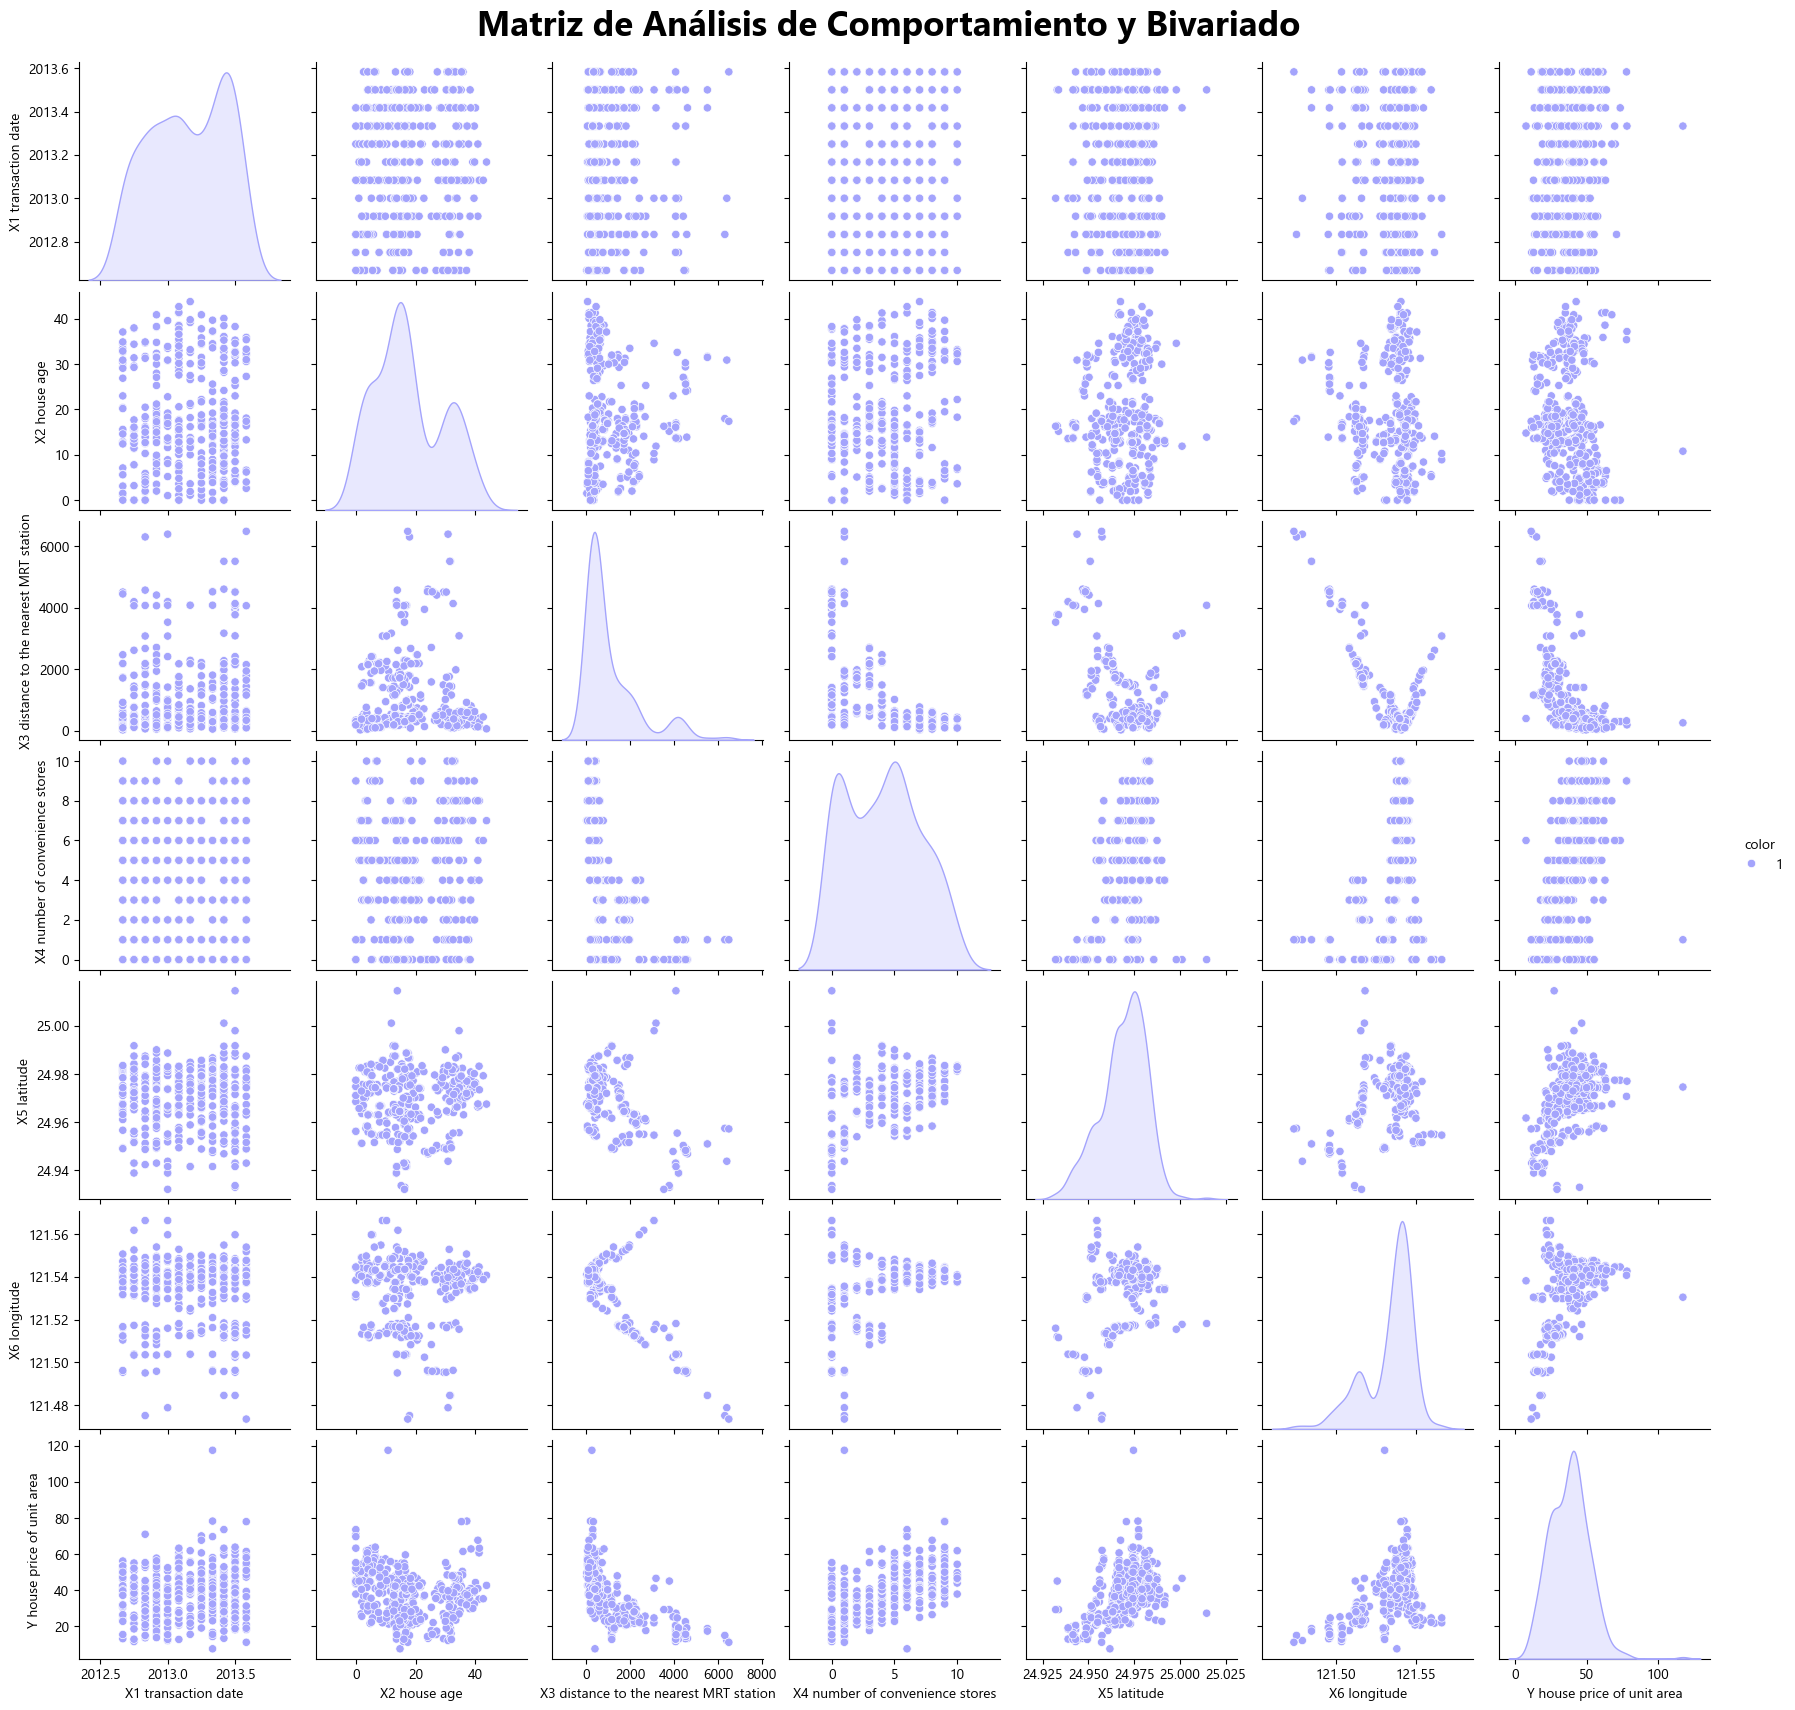

In [159]:
sns.set_context({
 'axes.labelsize': "medium"})
sns.set_style({'font.family':'Segoe UI'})
palette = ["#a4a4fc"]
palette_pr2 = ["#d7d7fc","#bdbdfc","#a4a4fc","#8b8bfc","#7371FC"]
data_t["color"] = 1
ax = sns.pairplot(data_t, palette=palette, hue="color")
ax.fig.subplots_adjust(top=0.95)
ax.fig.suptitle("Matriz de Análisis de Comportamiento y Bivariado", fontsize = 25, weight = "bold")

#### b) Correlaciones entre características y con la variable de respuesta.

Text(0.5, 1.0, 'Matriz de Correlación')

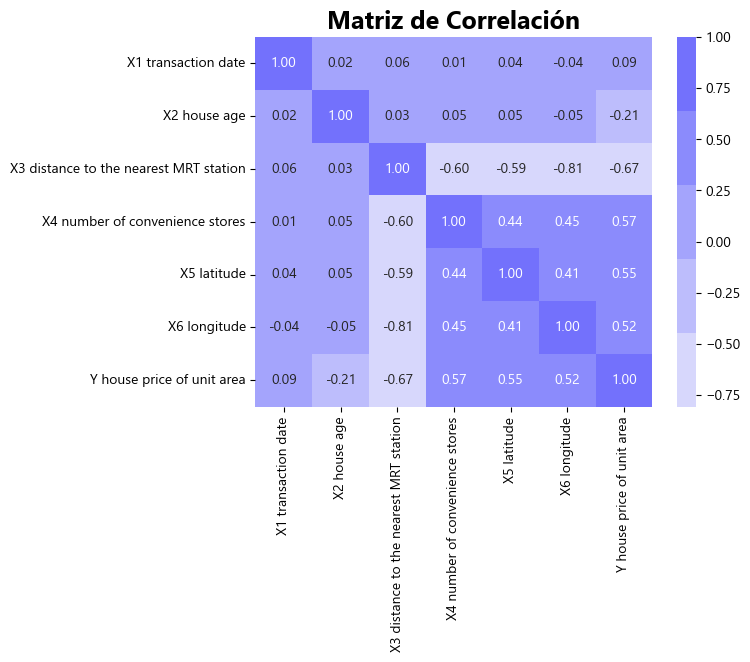

In [160]:
sns.set_context()
corr = data.corr()
#palette_pr1 = ["#e0aaff","#c77dff","#9d4edd","#7b2cbf", "#5a189a", "#3c096c", "#240046", "#10002b"]
#palette_gr = ["#c5f0c0","#aff0a8","#9af090","#6ef060","#59f048","#43f030", "#2ef018", "#18f000"]

ax = sns.heatmap(corr, cmap=palette_pr2, annot=True, fmt=".2f")
ax.set_title("Matriz de Correlación", fontdict={"color": "black", "weight": "bold", "fontsize": "18"})



#### c) Exploración bivariada entre cada característica y la variable de respuesta.

Text(0.5, 1.0, 'Coeficientes de Correlación X vs Y')

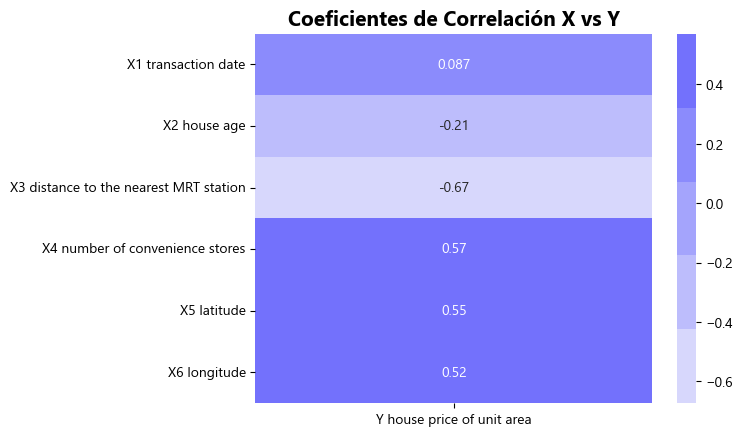

In [161]:
sns.set_context()
corrw = data.drop(['Y house price of unit area'], axis=1).corrwith(data['Y house price of unit area'])
ax = sns.heatmap(pd.DataFrame(corrw), cmap=palette_pr2, annot=True, xticklabels=["Y house price of unit area"])
ax.set_title("Coeficientes de Correlación X vs Y", fontdict={"color": "black", "weight": "bold", "fontsize": "15"})

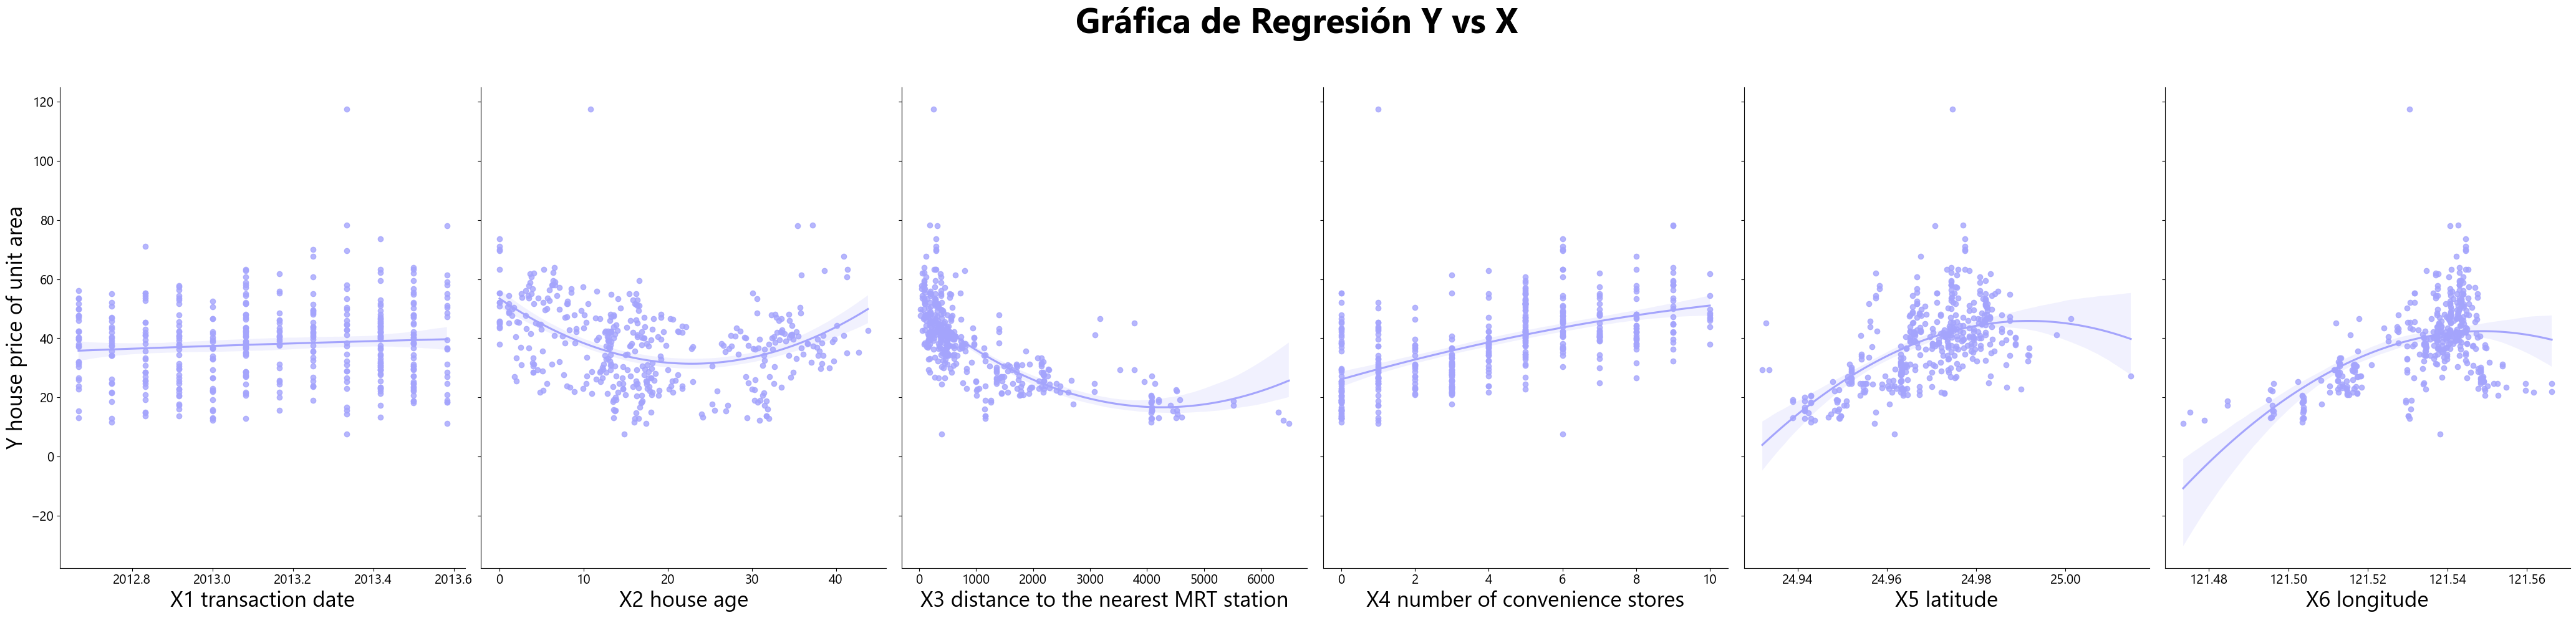

In [162]:
sns.set_context({
 'axes.labelsize': 25})
#ax.rcParams["axes.labelsize"] = 25
#ax.rcParams["xtick.labelsize"] = 25
#ax.rcParams["ytick.labelsize"] = 25
#ax = sns.pairplot(data_t,  x_vars=data.columns.drop("Y house price of unit area"), y_vars='Y house price of unit area', height=10, aspect=0.7, kind='reg', palette= palette, hue="color")

ax1 = sns.PairGrid(data_t, x_vars = data.columns.drop("Y house price of unit area"), y_vars='Y house price of unit area', height=10, aspect=0.7)
ax1.map(sns.regplot, color = "#a4a4fc", order=2)
#plt.xlabel('Date', fontsize=16)
#plt.ylabel('Sales', fontsize=50)
ax1.fig.subplots_adjust(top=0.85)
ax1.fig.suptitle("Gráfica de Regresión Y vs X", fontsize= 40, weight = "bold", fontproperties={'family':'Segoe UI'})
ax1.tick_params(labelsize=15)

## 3. Modelo de Regresión Lineal Multiple

$\bm{Y} = \bm{\beta} \bm{X} + \epsilon$

### Planteamiento de los Modelos

#### a) Métricas del modelo usando datos de entrenamiento

In [163]:
features = data.columns.drop("Y house price of unit area")
X = data.drop(columns="Y house price of unit area")
y = data["Y house price of unit area"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [164]:
# crear el objeto del modelo
linreg = LinearRegression()

# ajustar los parámetros del modelo usando los datos de entrenamiento
linreg.fit(X, y)

LinearRegression()

In [165]:
y_pred = linreg.predict(X_test)

In [166]:
# R squared adjusted
n = X_train.shape[0]
p = X_train.shape[1]
R2 = r2_score(y_test, y_pred)
R2_adj = 1 - (1-R2)*((n-1)/(n-p-1))
print(f' R2_adj: {round(R2_adj,3)}')

# mean absolute error
MAE = mean_absolute_error(y_test, y_pred)
print(f' MAE: {round(MAE,3)}')

# mean squared error
MSE = mean_squared_error(y_test, y_pred)
print(f' MSE: {round(MSE,3)}')

# root mean squared error
RMSE = root_mean_squared_error(y_test, y_pred)
print(f' RMSE: {round(RMSE,3)}')


 R2_adj: 0.713
 MAE: 5.186
 MSE: 42.726
 RMSE: 6.537


In [167]:
# coeficientes con nombre de las características
list(zip(features, linreg.coef_))

[('X1 transaction date', np.float64(5.146227462979911)),
 ('X2 house age', np.float64(-0.26969544758044595)),
 ('X3 distance to the nearest MRT station', np.float64(-0.004487461074043575)),
 ('X4 number of convenience stores', np.float64(1.133276904649107)),
 ('X5 latitude', np.float64(225.4729755631321)),
 ('X6 longitude', np.float64(-12.423601173340485))]

#### Modelo 1: usando todas las variables y métricas con los datos de prueba

In [168]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [169]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(331, 6)
(331,)
(83, 6)
(83,)


In [170]:
# crear el objeto del modelo
model1 = LinearRegression()

# ajustar los parámetros del modelo usando los datos de entrenamiento
model1.fit(X_train, y_train)

LinearRegression()

In [171]:
# imprimir coeficientes
print(model1.intercept_)
print(model1.coef_)

-12796.117684899313
[ 5.71714218e+00 -2.49326467e-01 -4.93769843e-03  1.07614509e+00
  2.27037100e+02 -3.56988335e+01]


In [172]:
# coeficientes con nombre de las características
list(zip(features, model1.coef_))

[('X1 transaction date', np.float64(5.717142183610284)),
 ('X2 house age', np.float64(-0.24932646689585305)),
 ('X3 distance to the nearest MRT station', np.float64(-0.004937698432022963)),
 ('X4 number of convenience stores', np.float64(1.076145093445308)),
 ('X5 latitude', np.float64(227.0371003711649)),
 ('X6 longitude', np.float64(-35.698833465050804))]

In [173]:
y_pred = model1.predict(X_test)

# R squared adjusted
n = X_train.shape[0]
p = X_train.shape[1]
R2 = r2_score(y_test, y_pred)
R2_adj = 1 - (1-R2)*((n-1)/(n-p-1))
print(f' R2_adj: {round(R2_adj,3)}')

# mean absolute error
MAE = mean_absolute_error(y_test, y_pred)
print(f' MAE: {round(MAE,3)}')

# mean squared error
MSE = mean_squared_error(y_test, y_pred)
print(f' MSE: {round(MSE,3)}')

# root mean squared error
RMSE = root_mean_squared_error(y_test, y_pred)
print(f' RMSE: {round(RMSE,3)}')



 R2_adj: 0.698
 MAE: 5.343
 MSE: 45.011
 RMSE: 6.709


#### Modelo 2: Usando Selección de Variables por Método Exahustivo (forward) 

In [174]:
sfs = SequentialFeatureSelector(LinearRegression(), n_features_to_select="auto", direction='forward', scoring="neg_mean_squared_error", tol=0.0001)

In [175]:
model2 = make_pipeline(sfs,LinearRegression())
model2.fit(X_train,y_train)

Pipeline(steps=[('sequentialfeatureselector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           scoring='neg_mean_squared_error',
                                           tol=0.0001)),
                ('linearregression', LinearRegression())])

In [176]:
# coeficientes con nombre de las características
list(zip(features, model2[1].coef_))

[('X1 transaction date', np.float64(5.711216138001998)),
 ('X2 house age', np.float64(-0.24771339595365308)),
 ('X3 distance to the nearest MRT station', np.float64(-0.004543137478377479)),
 ('X4 number of convenience stores', np.float64(1.0921857159071926)),
 ('X5 latitude', np.float64(230.96387588645797))]

In [177]:
y_pred = model2.predict(X_test)

# R squared adjusted
n = X_train.shape[0]
p = X_train.shape[1]
R2 = r2_score(y_test, y_pred)
R2_adj = 1 - (1-R2)*((n-1)/(n-p-1))
print(f' R2_adj: {round(R2_adj,3)}')

# mean absolute error
MAE = mean_absolute_error(y_test, y_pred)
print(f' MAE: {round(MAE,3)}')

# mean squared error
MSE = mean_squared_error(y_test, y_pred)
print(f' MSE: {round(MSE,3)}')

# root mean squared error
RMSE = root_mean_squared_error(y_test, y_pred)
print(f' RMSE: {round(RMSE,3)}')


 R2_adj: 0.702
 MAE: 5.332
 MSE: 44.43
 RMSE: 6.666


#### Modelo 3: Usando Selección de Variables por Método Exahustivo (forward) y Crear variables polinómicas

In [178]:
sfs2 = SequentialFeatureSelector(LinearRegression(), n_features_to_select="auto", direction='forward', scoring="neg_mean_squared_error", tol=0.0001)
poly = PolynomialFeatures(3)
poly_t = poly.fit_transform(X)
target_feature_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(X.columns,p) for p in poly.powers_]]
X_t = pd.DataFrame(poly_t, columns = target_feature_names)
X_train, X_test, y_train, y_test = train_test_split(X_t, y, random_state=1, test_size=0.2)
model3 = LinearRegression()
sfs1 = sfs2.fit(X_train, y_train)
X_sele = sfs1.transform(poly_t)
X_train_sele = sfs1.transform(X_train)
X_test_sele = sfs1.transform(X_test)

model3.fit(X_train_sele,y_train)

g:\Mi unidad\ANALITICA COMPUTACIONAL\venv.AC\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SequentialFeatureSelector was fitted with feature names
  warnings.warn(


LinearRegression()

In [179]:
sfs1.get_feature_names_out()

array(['X1 transaction date^1xX6 longitude^1',
       'X1 transaction date^2xX2 house age^1',
       'X1 transaction date^2xX5 latitude^1',
       'X1 transaction date^1xX3 distance to the nearest MRT station^1xX5 latitude^1',
       'X2 house age^3', 'X3 distance to the nearest MRT station^3',
       'X3 distance to the nearest MRT station^2xX5 latitude^1',
       'X3 distance to the nearest MRT station^1xX6 longitude^2'],
      dtype=object)

In [180]:
y_pred = model3.predict(X_test_sele)

# R squared adjusted
n = X_train_sele.shape[0]
p = X_train_sele.shape[1]
R2 = r2_score(y_test, y_pred)
R2_adj = 1 - (1-R2)*((n-1)/(n-p-1))
print(f' R2_adj: {round(R2_adj,3)}')

# mean absolute error
MAE = mean_absolute_error(y_test, y_pred)
print(f' MAE: {round(MAE,3)}')

# mean squared error
MSE = mean_squared_error(y_test, y_pred)
print(f' MSE: {round(MSE,3)}')

# root mean squared error
RMSE = root_mean_squared_error(y_test, y_pred)
print(f' RMSE: {round(RMSE,3)}')

 R2_adj: 0.717
 MAE: 4.968
 MSE: 41.93
 RMSE: 6.475


#### b) Métricas del modelo usando validación cruzada

In [181]:

scores_m1 = cross_val_score(linreg, X, y, cv=50, scoring='neg_mean_squared_error')
mse_scores_m1 = - scores_m1
print(f'MSE modelo 1: {mse_scores_m1.mean()}')

scores_m2 = cross_val_score(model2, X, y, cv=50, scoring='neg_mean_squared_error')
mse_scores_m2 = - scores_m2
print(f'MSE modelo 2: {mse_scores_m2.mean()}')

scores_m3 = cross_val_score(model3, X_sele, y, cv=50, scoring='neg_mean_squared_error')
mse_scores_m3 = - scores_m3

print(f'MSE modelo 3: {mse_scores_m3.mean()}')

MSE modelo 1: 80.30134559151928
MSE modelo 2: 80.04062372375827
MSE modelo 3: 59.80532545084779


In [182]:
# Modelo 1

scores_m1 = cross_val_score(linreg, X, y, cv=50, scoring='neg_mean_squared_error')
mse_scores_m1 = - scores_m1

mae_scores_m1 = cross_val_score(linreg, X, y, cv=50, scoring='neg_mean_absolute_error')
mae_scores_m1 = - mae_scores_m1

print(f'MSE (modelo 1): {mse_scores_m1.mean()}')
print(f'RMSE (modelo 1): {np.sqrt(mse_scores_m1).mean()}')
print(f'MAE (modelo 1): {mae_scores_m1.mean()}')

MSE (modelo 1): 80.30134559151928
RMSE (modelo 1): 8.113362268166263
MAE (modelo 1): 6.242123174624294


#### c) Evaluación del modelo y sus parámetros empleando pruebas estadísticas

#### Modelo 1

In [183]:

features = data.columns.drop("Y house price of unit area")

X_m1 = data[features]
y = data["Y house price of unit area"]
# agregar constante explíticamente
X_m1 = sm.add_constant(X_m1)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model1_stats = sm.OLS(y, X_m1).fit()

# resumen de resultados
print(model1_stats.summary())


                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.582
Model:                                    OLS   Adj. R-squared:                  0.576
Method:                         Least Squares   F-statistic:                     94.59
Date:                        Tue, 27 Aug 2024   Prob (F-statistic):           4.86e-74
Time:                                13:19:03   Log-Likelihood:                -1487.0
No. Observations:                         414   AIC:                             2988.
Df Residuals:                             407   BIC:                             3016.
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [184]:
print(f'MSE resid: {round(model1_stats.mse_resid,3)}')

MSE resid: 78.458


In [185]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
X_m1 = pd.DataFrame(X_m1)
X_m1 = X_m1.drop(columns=["const"])
vif_data = pd.DataFrame()
vif_data["feature"] = X_m1.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_m1.values, i)
                          for i in range(len(X_m1.columns))]

vif_data

,feature,VIF
0,X1 transaction date,4.253389e+07
1,X2 house age,3.471392e+00
2,X3 distance to the nearest MRT station,4.261358e+00
3,X4 number of convenience stores,4.748152e+00
4,X5 latitude,6.178301e+06
5,X6 longitude,4.198817e+07


In [186]:

## Editar funcion influence_plot de la libreria de seaborn graphics
#  para cambiar color grafico 

def _high_leverage(results):
    #TODO: replace 1 with k_constant
    return 2. * (results.df_model + 1)/results.nobs

def _influence_plot(results, influence, external=True, alpha=.05,
                    criterion="cooks", size=48, plot_alpha=.75, ax=None, color=None, title= "Influence Plot",
                    **kwargs):
    infl = influence
    fig, ax = utils.create_mpl_ax(ax)

    if criterion.lower().startswith('coo'):
        psize = infl.cooks_distance[0]
    elif criterion.lower().startswith('dff'):
        psize = np.abs(infl.dffits[0])
    else:
        raise ValueError("Criterion %s not understood" % criterion)

    # scale the variables
    #TODO: what is the correct scaling and the assumption here?
    #we want plots to be comparable across different plots
    #so we would need to use the expected distribution of criterion probably
    old_range = np.ptp(psize)
    new_range = size**2 - 8**2

    psize = (psize - psize.min()) * new_range/old_range + 8**2

    leverage = infl.hat_matrix_diag
    if external:
        resids = infl.resid_studentized_external
    else:
        resids = infl.resid_studentized

    from scipy import stats

    cutoff = stats.t.ppf(1.-alpha/2, results.df_resid)
    large_resid = np.abs(resids) > cutoff
    large_leverage = leverage > _high_leverage(results)
    large_points = np.logical_or(large_resid, large_leverage)

    ax.scatter(leverage, resids, s=psize, alpha=plot_alpha,c=color)
    plt.xlim(min(leverage)/1.5, max(leverage)*1.2)
    plt.ylim(min(resids)/1.5, max(resids)*1.4)
    # add point labels
    labels = results.model.data.row_labels
    if labels is None:
        labels = lrange(len(resids))
    ax = utils.annotate_axes(np.where(large_points)[0], labels,
                             lzip(leverage, resids),
                             lzip(-(psize/2)**.5, (psize/2)**.5), "medium",
                             ax)

    #TODO: make configurable or let people do it ex-post?
    font = {"fontsize" : 16, "color" : "black"}
    ax.set_ylabel("Residuos Estudentizados", **font)
    ax.set_xlabel("Apalancamiento h", **font)
    ax.set_title(title, fontsize=20, weight="bold")
    
    return fig

def influence_plot(results, external=True, alpha=.05, criterion="cooks",
                   size=48, plot_alpha=.75, ax=None, color=None, title= "Influence Plot", **kwargs):
    infl = results.get_influence()
    res = _influence_plot(results, infl, external=external, alpha=alpha,
                          criterion=criterion, size=size,
                          plot_alpha=plot_alpha, ax=ax,color=color, title=title, **kwargs)
    return res

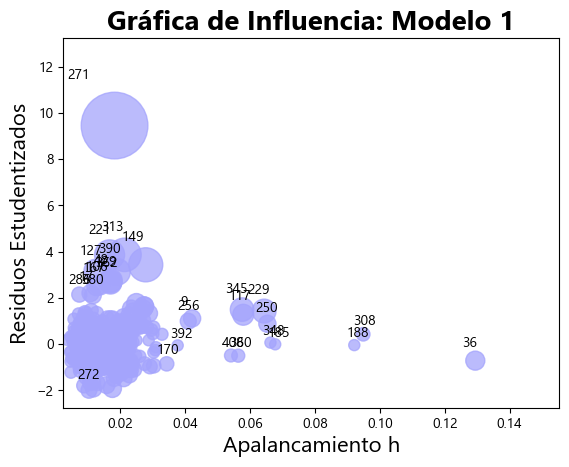

In [187]:
fig = influence_plot(model1_stats, criterion="cooks", color=palette, title="Gráfica de Influencia: Modelo 1")

In [190]:
# disntacia de Cook
model_cooksd = model1_stats.get_influence().cooks_distance[0]

# get length of df to obtain n
n = X_m1.shape[0]

# umbral
critical_d = 4/n
print('Umbral con distancia de Cook:', critical_d)

# puntos que podrían ser ourliers con alta influencia
out_d = model_cooksd > critical_d

print(X_m1.index[out_d], "\n", model_cooksd[out_d])

Umbral con distancia de Cook: 0.00966183574879227
Index([ 36,  48, 106, 114, 117, 127, 129, 149, 165, 167, 221, 229, 271, 313,
       345, 362, 383, 387, 390],
      dtype='int64', name='No') 
 [0.01080166 0.01850922 0.01285264 0.02081027 0.01414126 0.01758349
 0.01778441 0.04692988 0.01059884 0.01147406 0.03499743 0.02006273
 0.19484937 0.04485589 0.01943111 0.01711642 0.01140233 0.01074875
 0.02650477]


#### Modelo 2

In [191]:
X_m2 = data[model2[0].get_feature_names_out()]
y = data["Y house price of unit area"]

X_train, X_test, y_train, y_test = train_test_split(X_m2, y, random_state=1, test_size=0.2)

# agregar constante explíticamente
X_m2 = sm.add_constant(X_m2)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model2_stats = sm.OLS(y, X_m2).fit()

# resumen de resultados
print(model2_stats.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.582
Model:                                    OLS   Adj. R-squared:                  0.577
Method:                         Least Squares   F-statistic:                     113.8
Date:                        Tue, 27 Aug 2024   Prob (F-statistic):           4.47e-75
Time:                                13:19:45   Log-Likelihood:                -1487.0
No. Observations:                         414   AIC:                             2986.
Df Residuals:                             408   BIC:                             3010.
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [192]:
print(f'MSE resid: {round(model2_stats.mse_resid,3)}')

MSE resid: 78.279


In [193]:
X_m2 = pd.DataFrame(X_m2)
X_m2 = X_m2.drop(columns=["const"])

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_m2.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_m2.values, i)
                          for i in range(len(X_m2.columns))]
vif_data

,feature,VIF
0,X1 transaction date,5.989966e+06
1,X2 house age,3.465216e+00
2,X3 distance to the nearest MRT station,3.498859e+00
3,X4 number of convenience stores,4.695585e+00
4,X5 latitude,5.988647e+06


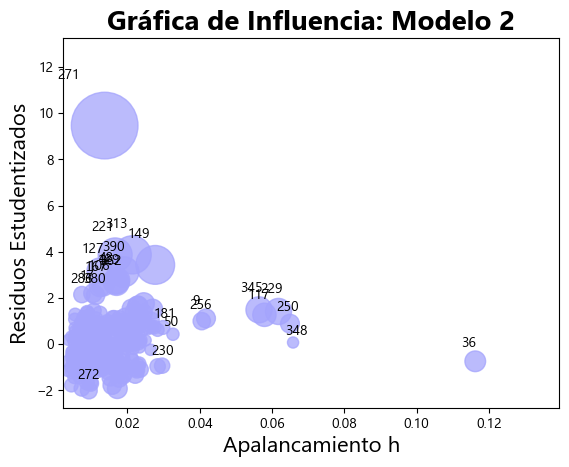

In [194]:
fig =influence_plot(model2_stats, criterion="cooks", color=palette, title="Gráfica de Influencia: Modelo 2")

In [199]:
# disntacia de Cook
model_cooksd = model2_stats.get_influence().cooks_distance[0]

# get length of df to obtain n
n = X_m2.shape[0]

# umbral
critical_d = 4/n
print('Umbral con distancia de Cook:', critical_d)

# puntos que podrían ser ourliers con alta influencia
out_d = model_cooksd > critical_d

print(X_m2.index[out_d], "\n", model_cooksd[out_d])

Umbral con distancia de Cook: 0.00966183574879227
Index([ 36,  48, 106, 114, 117, 127, 129, 149, 165, 167, 195, 221, 229, 271,
       313, 335, 345, 362, 383, 387, 390],
      dtype='int64', name='No') 
 [0.01200107 0.02164592 0.0144461  0.02334534 0.01654618 0.02056066
 0.02061566 0.05441179 0.01048082 0.01299576 0.01060947 0.0405698
 0.021984   0.17009228 0.05241991 0.0106709  0.02194709 0.01995971
 0.01298324 0.01062749 0.03099693]


#### Modelo 3

In [204]:
X_m3 = X_t[list(sfs1.get_feature_names_out())]
y = list(data["Y house price of unit area"])
#X_m3 = scale.fit_transform(X_m3)
#X_train, X_test, y_train, y_test = train_test_split(X_m3, y, random_state=1, test_size=0.2)

# agregar constante explíticamente
X_m3 = sm.add_constant(X_m3)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model3_stats = sm.OLS(y, X_m3).fit()

# resumen de resultados
print(model3_stats.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     113.4
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           1.97e-98
Time:                        13:20:50   Log-Likelihood:                -1424.4
No. Observations:                 414   AIC:                             2867.
Df Residuals:                     405   BIC:                             2903.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [201]:
print(f'MSE resid: {round(model3_stats.mse_resid,3)}')

MSE resid: 58.273


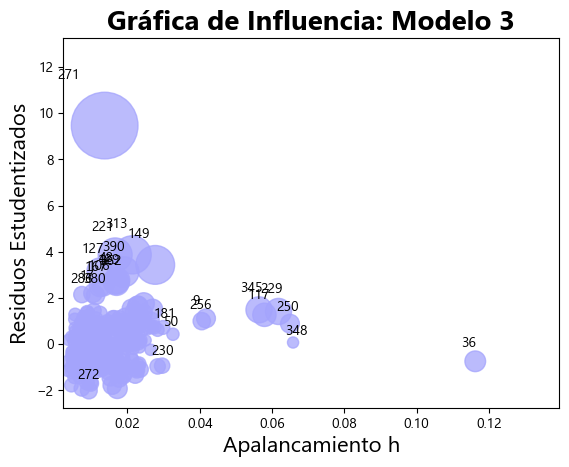

In [202]:
fig =influence_plot(model2_stats, criterion="cooks", color=palette,  title="Gráfica de Influencia: Modelo 3")

In [205]:
# disntacia de Cook
model_cooksd = model3_stats.get_influence().cooks_distance[0]

# get length of df to obtain n
n = X_m3.shape[0]

# umbral
critical_d = 4/n
print('Umbral con distancia de Cook:', critical_d)

# puntos que podrían ser ourliers con alta influencia
out_d = model_cooksd > critical_d

print(X_m3.index[out_d], "\n", model_cooksd[out_d])

Umbral con distancia de Cook: 0.00966183574879227
Index([ 35,  47, 105, 113, 116, 126, 128, 148, 166, 173, 192, 220, 228, 233,
       249, 270, 312, 344, 361, 382, 389, 392],
      dtype='int64') 
 [0.13160098 0.01436627 0.01095011 0.02117863 0.02441433 0.03293633
 0.01653201 0.05237134 0.01056098 0.01207161 0.01040742 0.03133278
 0.04024194 0.01432541 0.01484337 0.06700757 0.03454483 0.03131294
 0.02312455 0.01727073 0.02978293 0.01376986]
